Curso: Machine Learning

Aluna: Sara Coutinho. 

Data: 25/05/2023.

Este notebook contém a atividade solicitada pelo curso de Machine Learning : Implementação de modelos e verificação de eficiência da estratégia adotada em problemas de regressão e classificação. 

A seguir esta a resolução dos tópicos solicitados em cada questão na descrição da atividade. 

In [ ]:
#---Preparaçao do Ambiente

#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#data colletion 
df = pd.read_csv('/content/FuelConsumptionCo2.csv')

In [ ]:
#visualizando uma amostra do conjunto de dados
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
21,2014,AUDI,A4 QUATTRO,COMPACT,2.0,4,M6,Z,10.8,7.5,9.3,30,214
709,2014,MAZDA,MAZDA3 5-DOOR,MID-SIZE,2.0,4,M6,X,8.2,5.9,7.2,39,166
606,2014,KIA,FORTE 5,FULL-SIZE,1.6,4,M6,X,11.1,8.2,9.8,29,225
519,2014,HYUNDAI,TUCSON,SUV - SMALL,2.4,4,A6,X,11.3,8.3,10.0,28,230
92,2014,BMW,428i COUPE,COMPACT,2.0,4,M6,Z,10.4,6.7,8.7,32,200


In [ ]:
#visualizando as colunas
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
#conferindo se existem valores nulos ou repetidos no conjunto 
print('Existem : ',df.isnull().sum().sum(),'valores nulos no conjunto')
print('Existem : ',df.duplicated().sum(),'valores repetidos no conjunto')

Existem :  0 valores nulos no conjunto
Existem :  0 valores repetidos no conjunto


In [ ]:
#visualizando os tipos de variaveis do conjunto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
#visualizando o shape do conjunto
df.shape

(1067, 13)

Existem 1067 dados em um conjunto único. Cada um é descrito em 13 variáveis. Algumas variáveis são categóricas. Elas serão transformadas a fim plotar a matriz de correlação entre as variáveis do conjunto. Variáveis categóricas: MAKE, MODEL, VEHICLECLASS, TRANSMISSION, FUELTYPE. As variáveis MODELYEAR, CYLINDERS serão transformadas para float.  

In [ ]:
#plotando a correlaçao de pearson antes de transformar o tipo das variaveis

#correlaçao a partir da variavel enginesize
corr = df.iloc[:,1:].corr()
display(corr)

<ipython-input-60-db73e6bd23d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.iloc[:,1:].corr()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [ ]:
#transformando variaveis int para float
df['MODELYEAR'] = df['MODELYEAR'].astype(float)
df['CYLINDERS'] = df['CYLINDERS'].astype(float)

In [ ]:
#criando dicionarios para converter as variaveis categoricas em numéricas

#dict para conversao 

def conversao(data):
  dict_column,i = {},0
  unique = data.unique()
  for name in unique:
    i += 1
    dict_column[name]=float(i)
  return dict_column

df.MAKE = df.MAKE.map(conversao(df.MAKE))
df.MODEL = df.MODEL.map(conversao(df.MODEL))
df.VEHICLECLASS = df.VEHICLECLASS.map(conversao(df.VEHICLECLASS))
df.TRANSMISSION = df.TRANSMISSION.map(conversao(df.TRANSMISSION))
df.FUELTYPE = df.FUELTYPE.map(conversao(df.FUELTYPE))

In [ ]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,9.9,6.7,8.5,33,196
1,2014.0,1.0,1.0,1.0,2.4,4.0,2.0,1.0,11.2,7.7,9.6,29,221
2,2014.0,1.0,2.0,1.0,1.5,4.0,3.0,1.0,6.0,5.8,5.9,48,136
3,2014.0,1.0,3.0,2.0,3.5,6.0,4.0,1.0,12.7,9.1,11.1,25,255
4,2014.0,1.0,4.0,2.0,3.5,6.0,4.0,1.0,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014.0,39.0,661.0,2.0,3.0,6.0,4.0,3.0,13.4,9.8,11.8,24,271
1063,2014.0,39.0,661.0,2.0,3.2,6.0,4.0,3.0,13.2,9.5,11.5,25,264
1064,2014.0,39.0,662.0,2.0,3.0,6.0,4.0,3.0,13.4,9.8,11.8,24,271
1065,2014.0,39.0,662.0,2.0,3.2,6.0,4.0,3.0,12.9,9.3,11.3,25,260


<Axes: >

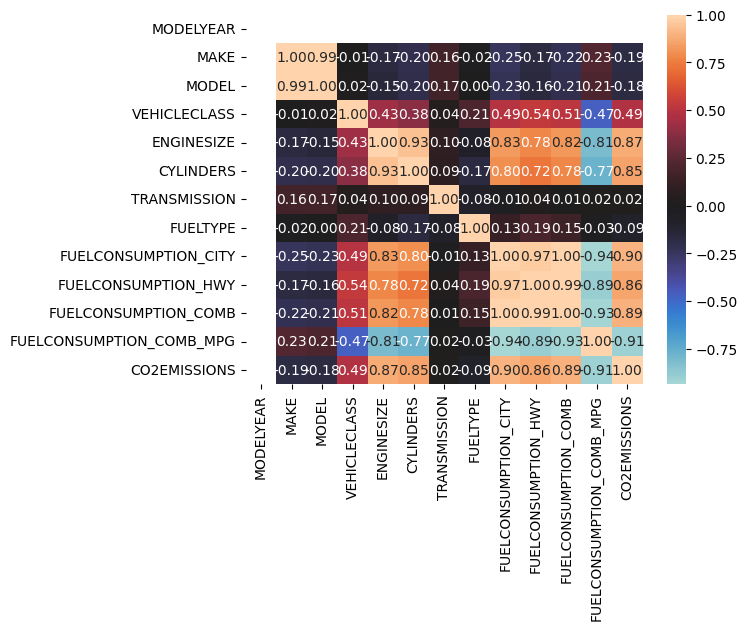

In [ ]:
# 1. Exiba a Matriz de Correlação entre as variáveis
#mapa de calor
sb.heatmap(df.corr(), fmt=".2f", annot=True, center=0.0)

In [ ]:
# 2. Atualize os nomes das seguintes colunas
df = df.rename(columns={ 'FUELCONSUMPTION_CITY':'FUELCONSCITY', 'FUELCONSUMPTION_HWY':'FUELCONSHWY',
                   'FUELCONSUMPTION_COMB':'FUELCONSCOMB','FUELCONSUMPTION_COMB_MPG':'FUELCONSCOMBMPG'})

In [ ]:
# 3. Crie um novo dataframe com as seguintes colunas

#colunas com altos valores de correlaçao
df2 = df[['ENGINESIZE','CYLINDERS','FUELCONSCOMB','CO2EMISSIONS']]

In [ ]:
df2

,ENGINESIZE,CYLINDERS,FUELCONSCOMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [ ]:
# 4. Faça as seguintes análises:

# 4.1. Separe os dados de treino e teste

from sklearn.model_selection import train_test_split

#percentual adotado de 70, 30
treino, teste = train_test_split(df2, test_size=0.3, random_state=42)

In [ ]:
print('Shape do conjunto de treino: ',treino.shape)
print('Shape do conjunto de teste: ',teste.shape)

Shape do conjunto de treino:  (746, 4)
Shape do conjunto de teste:  (321, 4)


In [ ]:
# 4.2. Import sklearn library
import sklearn 

In [ ]:
#4.3. Crie a variável com o modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
#variavel com o modelo
lr = LinearRegression()

In [ ]:
# 4.4. Separe os dados de treino e teste

#percentual adotado de 70, 30
treino, teste = train_test_split(df2, test_size=0.3, random_state=42)

In [ ]:
# 4.5. Separe as Features de Treino e Teste

#escolhendo a primeira variavel ENGINESIZE como x e CO2EMISSIONS como y 
X = df['ENGINESIZE']
y = df['CO2EMISSIONS']

In [ ]:
X_treino, y_treino = np.asanyarray(treino['ENGINESIZE']), np.asanyarray(treino['CO2EMISSIONS'])
X_teste, y_teste = np.asanyarray(teste['ENGINESIZE']), np.asanyarray(teste['CO2EMISSIONS'])

In [ ]:
# 4.6. Rode o Modelo
modelo = lr.fit(X_treino.reshape(-1, 1), y_treino.reshape(-1, 1))

In [ ]:
# 4.7. Defina os valores para os coeficientes Theta 0: Intercepto e Theta 1: Coeficiente
#valor do Theta 1 
print('Valor Theta 1 (coeficiente): ',modelo.coef_)
print('Valor Theta 0 (intercepto): ',modelo.intercept_)

Valor Theta 1 (coeficiente):  [[38.98292922]]
Valor Theta 0 (intercepto):  [126.35436294]


In [ ]:
y_predito = modelo.predict(X_teste.reshape(-1, 1))

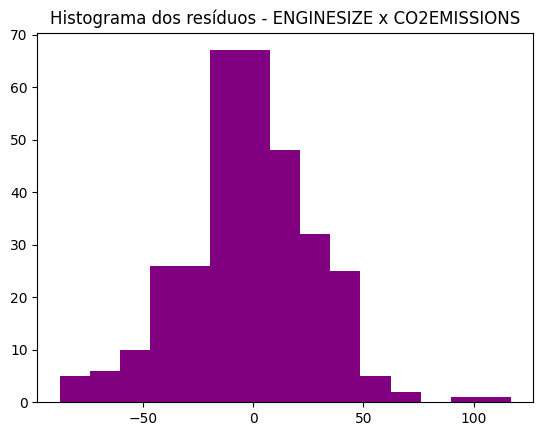

In [ ]:
residuo = y_teste.reshape(-1, 1) - y_predito

plt.hist(residuo, color='purple', bins=15)
plt.title('Histograma dos resíduos - ENGINESIZE x CO2EMISSIONS')
plt.show()

Equação : 
* y = 38.98 x + 126.35

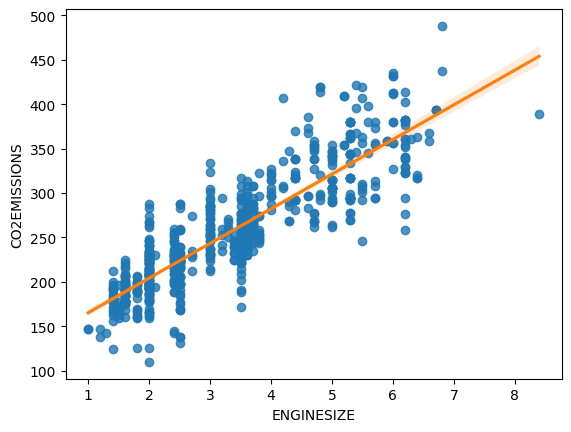

In [ ]:
# 4.7. Plot o Gráfico de Regressão Linear com a Reta Ajustada

ax = sb.regplot(x='ENGINESIZE', y='CO2EMISSIONS', line_kws={"color":"C1"},data=treino)

#ax.legend('')

plt.show()


In [ ]:
# 4.8. Encontre o R2-Score
from sklearn.metrics import r2_score
print('O R2-Score obtido é: ', round(r2_score(y_teste.reshape(-1, 1),y_predito),2))

O R2-Score obtido é:  0.78


In [ ]:
# 5. Encontre o Melhor ajuste (R2-Score) entre as combinações de variáveis abaixo

treino, teste = train_test_split(df2, test_size=0.3, random_state=42)
y_treino, y_teste = np.asanyarray(treino['CO2EMISSIONS']), np.asanyarray(teste['CO2EMISSIONS'])

#5.1.  FUELCONSCOMB & CO2EMISSIONS

X_treino, X_teste = np.asanyarray(treino['FUELCONSCOMB']), np.asanyarray(teste['FUELCONSCOMB'])
lr = LinearRegression()
modelo = lr.fit(X_treino.reshape(-1, 1), y_treino.reshape(-1, 1))
y_predito = modelo.predict(X_teste.reshape(-1, 1))
print('O R2-Score obtido para FUELCONSCOMB & CO2EMISSIONS é: ', round(r2_score(y_teste.reshape(-1, 1),y_predito),2))

#5.2. CYLINDERS & CO2EMISSIONS
X_treino, X_teste = np.asanyarray(treino['CYLINDERS']), np.asanyarray(teste['CYLINDERS'])
lr = LinearRegression()
modelo = lr.fit(X_treino.reshape(-1, 1), y_treino.reshape(-1, 1))
y_predito = modelo.predict(X_teste.reshape(-1, 1))
print('O R2-Score obtido para CYLINDERS & CO2EMISSIONSé: ', round(r2_score(y_teste.reshape(-1, 1),y_predito),2))

#5.3. ENGINESIZE & CO2EMISSIONS
X_treino, X_teste = np.asanyarray(treino['ENGINESIZE']), np.asanyarray(teste['ENGINESIZE'])
lr = LinearRegression()
modelo = lr.fit(X_treino.reshape(-1, 1), y_treino.reshape(-1, 1))
y_predito = modelo.predict(X_teste.reshape(-1, 1))
print('O R2-Score obtido para ENGINESIZE & CO2EMISSIONS é: ', round(r2_score(y_teste.reshape(-1, 1),y_predito),2))

O R2-Score obtido para FUELCONSCOMB & CO2EMISSIONS é:  0.8
O R2-Score obtido para CYLINDERS & CO2EMISSIONSé:  0.74
O R2-Score obtido para ENGINESIZE & CO2EMISSIONS é:  0.78


Dentre as combinações avaliadas, a que obteve o maior valor para o R2-Score foi a FUELCONSCOMB para o CO2EMISSIONS. O interessante é que dentre as 3 variáveis independentes combinadas ao CO2EMISSIONS, a FUELCONSCOMB foi a que obteve o maior valor de correlação com a CO2EMISSIONS, o que pode explicar o alcance do maior valor de R2-Score na regressão em função dela. Contudo, todos os resultados de R2-Score obtidos pelas 3 regressões são valores altos e indicam que possivelmente elas possuem certa confiabilidade.  Além disso, todas as 3 variáveis independentes utilizadas em cada uma das regressões possuem alta correlação com a CO2EMISSIONS. 

In [ ]:
# 6. Tente realizar uma Regressão Linear Múltipla. Use as três variáveis.  

In [ ]:
treino, teste = train_test_split(df2, test_size=0.3, random_state=42)

#variavel dependente
y_treino, y_teste = np.asanyarray(treino['CO2EMISSIONS']), np.asanyarray(teste['CO2EMISSIONS'])
#variaveis independentes 
X_treino, X_teste = np.asanyarray(treino.drop(columns=['CO2EMISSIONS'])), np.asanyarray(teste.drop(columns=['CO2EMISSIONS']))
#modelo 
lr = LinearRegression()
modelo = lr.fit(X_treino, y_treino)


In [ ]:
#coeficientes da regressao linear multipla 
print('Coeficientes do modelo: ',modelo.coef_)

Coeficientes do modelo:  [10.91586089  7.074642    9.69391531]


In [ ]:
#Intercepto da regressao linear multipla 
print('Intercepto do modelo: ',modelo.intercept_)

Intercepto do modelo:  66.77239925918903


In [ ]:
#verificando valores arredondados
print(round(10.91586089,2),round(7.074642,2),round(9.69391531,2))
print(round(66.77239925918903,2))

10.92 7.07 9.69
66.77


Seguindo a ordem das variáveis no conjunto, os coeficientes para a variáveis são (arredondando em 2 cadas decimais):  ENGINESIZE é 10.92, para a variável CYLINDERS é 7.07 e para FUELCONSCOMB é 9.69.  

O valor do intercepto (também arredondando em 2 casas decimais) é: 66.77. 

Considerando esses valores a Equação final da regressão múltipla é: 
* y = 10.92 x1 + 7.07 x2 + 9.69 x3 + 66.77

In [ ]:
y_predito = modelo.predict(X_teste)
print('O R2-Score obtido para Regressao Linear Multipla é: ', round(r2_score(y_teste,y_predito),2))

O R2-Score obtido para Regressao Linear Multipla é:  0.88


O valor obtido considerando as 3 variáveis possuiu um R2-Score bom, sobretudo considerando que ele foi maior que os obtidos pelas regressões lineares  simples.

**Conclusões**

Neste trabalho foi realizada a criação de modelos de regressão linear a partir do conjunto de dados proposto. A etapa de exploração dos dados permitiu a análise das correlações de Pearson das variáveis independentes do conjunto com a variável dependente, a CO2EMISSIONS, a qual é correspondente aos valores medidos de consumo de CO2. As variáveis analisadas apresentaram correlações altas com a CO2EMISSIONS. Uma delas, a FUELCONSUMPTION_COMB_MPG apresentou uma correlação alta negativa, mas as demais foram positivas. 

Do conjunto foram selecionadas 3 variáveis independentes para as análises de modelos de regressão, as quais foram: ENGINESIZE, CYLINDERS e FUELCONSUMTION_COMB (renomeada para FUELCONSCOMB). Todas as 3 possuíram alta correlação positiva com a variável dependente. As correlações de Pearson obtidas por cada uma delas foram aproximadamente: 
* ENGINESIZE : 0.87
* CYLINDERS : 0.85
* FUELCONSCOMB : 0.89

Foram verificados os desempenhos dos modelos de regressão linear para cada uma delas e a variável predita CO2EMISSIONS. Foram utilizados conjuntos de treino correspondendo a quantidade de 70% dos dados e o de teste a 30% deles. O modelo que alcançou o melhor resultado foi obtido pelo FUELCONSCOMB & CO2EMISSIONS. Este obteve o resultado de R2-Score de 0.8, seguido pelo modelo da combinação ENGINESIZE & CO2EMISSIONS, com 0.78 e por último o CYLINDERS & CO2EMISSIONS com 0.74. O interessante de observar é que quanto mais correlacionada foi a variável com a CO2EMISSIONS, maior o valor de R2-Score encontrado pelo modelo de regressão em função dessa variável.  

Em seguida foi feito um modelo de regressão linear múltipla. Este apresentou um resultado de R2-Score de 0.88, o qual foi maior que os das regressões lineares simples. Isto indica que nesta atividade para os dados utilizados o modelo de regressão linear formado a partir de várias variáveis apresentou uma maior capacidade de generalização que modelos com apenas uma variável.